In [22]:
import os
import random

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import scipy.stats as sp

import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf

#%config InlineBackend.figure_format = 'svg'

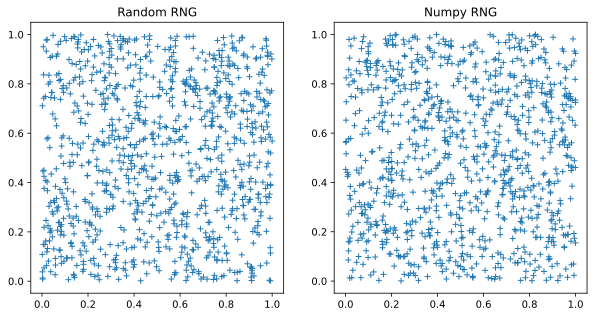

In [23]:
n = 1000 # number of random numbers to plot

numpy_random = np.random.random(size=n)
python_random = [random.random() for x in range(n)]

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].set_title('Random RNG')
axs[0].plot(numpy_random[0:len(numpy_random)-10],numpy_random[10:len(numpy_random)],'+')
axs[1].set_title('Numpy RNG')
axs[1].plot(python_random[0:len(python_random)-10],python_random[10:len(python_random)],'+')
#plt.savefig('report/images/task1', dpi=300)


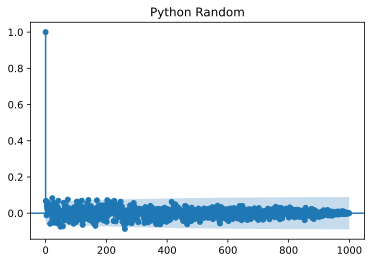

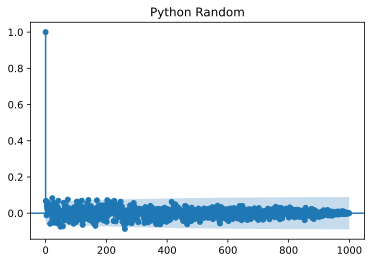

In [24]:
plot_acf(numpy_random,lags=n-1, title='Python Random')
#plt.savefig('report/images/task1a1', dpi=300)

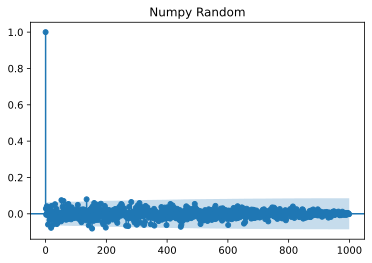

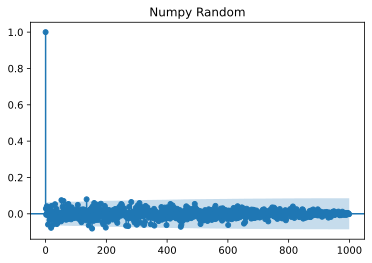

In [25]:
plot_acf(python_random,lags=n-1,title='Numpy Random')
#plt.savefig('report/images/task1a2', dpi=300)

In [26]:
def frequencies(array, bins):

    a_min, a_max = min(array), max(array)
    bin_size = a_max/bins

    upper = a_min

    frq = np.array([])
    
    for lower in np.arange(a_min, a_max, bin_size):
        upper += bin_size
        count = 0
        for i in array:
            if lower <= i <= upper:
                count += 1
        frq = np.append(frq,count)
    
    #chi_sq = np.sum((np.square(frq-(n/bins))/(bins)))
    #chi_sq = np.sum(np.square(frq-(n/b   ins))/bins)
    #print('custom',n, chi_sq)

    return frq

In [27]:
bins = 100

py_chi2 = sp.chisquare(frequencies(python_random,bins))
np_chi2 = sp.chisquare(frequencies(numpy_random,bins))


In [28]:
print('Chi^2 py :',py_chi2[0], 'p : ', py_chi2[1])
print('Chi^2 py :',np_chi2[0], 'p : ', np_chi2[1])

Chi^2 py : 92.0 p :  0.6779651870359542
Chi^2 py : 84.80000000000001 p :  0.8446836841289884
